# KaggleX Skill Assessment Challenge

## Import libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
print("Success!")

Success!


## Loading the dataset

In [7]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
print(df_train.shape)
print(df_test.shape)

(54273, 13)
(36183, 12)


## EDA

## Approach

In [11]:
#Data Cleaning
# Handle missing values - done
#Check dataset for outliers - done
# Check for data consistency and correctness
#Conduct univariate analysis : examine individual features to understand their distribution, central tendancies and spread
#bivariate analysis : relationships between pair features
#assess correlation, significance and dependencies
#assess multivariate analysis

#Data pre-processing
#feature scaling : standardize and normalize numerical features (mileage, engine displacement) to similar scale and improve model performance
#Feature engineering
#create new features from existing ones: (age of care, mileage per year)
#encode categorical variables (car make, model, fuel type) into numerical representation

#Data splitting
#Split data into Train and Test 

#Model selection and Training
#Choose appropriate regression model (linear regression, decision tree, random forest, gradient boosting)
#train using train dataset

#7. Model evaluation
#Predict car prices using trained model on testing data
#compute the RMSE using predicted prices and actual prices NB: Lower RMSE indicates better predictive accuracy.

#Model tuning and optimization
#fine tune hyper parameters to improve model performance
#consider cross validation techniques to validate model robustness
#Features for prediction

In [12]:
"""
Car Manufacturer: The brand or company that manufactured the car.
Car Model: The specific model of the car.
Car Age: The age of the car in years since its manufacturing.
Car Mileage: The number of miles the car has been driven.
Transmission Type
Safety Features
Door Count
Dimensions
Navigation System Presence
Vehicle Cost
"""

print("Measures of Central Tendancies\n")
print(df_train.describe())
print("\nData Info")
print(df_train.info())

Measures of Central Tendancies

                 id    model_year         milage         price
count  54273.000000  54273.000000   54273.000000  5.427300e+04
mean   27136.000000   2015.091979   72746.175667  3.921844e+04
std    15667.409917      5.588909   50469.490448  7.282634e+04
min        0.000000   1974.000000     100.000000  2.000000e+03
25%    13568.000000   2012.000000   32268.000000  1.550000e+04
50%    27136.000000   2016.000000   66107.000000  2.800000e+04
75%    40704.000000   2019.000000  102000.000000  4.500000e+04
max    54272.000000   2024.000000  405000.000000  2.954083e+06

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-

## Data Cleaning

In [13]:
## Check if there is a column with NA values
if all(df_train.isna().sum())>1:
    print(df_train.isna().sum())
    df = df_train.fillna(df_train.median()) #impute with median
else:
    print("No NA's in data")
## Check if there is a column with NA values
if all(df_test.isna().sum())>1:
    print(df_test.isna().sum())
    df = df_test.fillna(df_test.median()) #impute with median
else:
    print("No NA's in data")
print(df_train["id"].duplicated().sum())
print(df_test["id"].duplicated().sum())
print(df_train["id"].unique().sum())
print(df_test["id"].unique().sum())

No NA's in data
No NA's in data
0
0
1472752128
2618346612


## Feature Engineering

## Train Dataset

In [14]:
print(df_train.columns)
print("Model Year : ", len(df_train["model_year"].unique()))
print("Brand : ", len(df_train["brand"].unique()))
print("Fuel Type : ", len(df_train["fuel_type"].unique()))
print("Engine : ", len(df_train["engine"].unique()))
print("Transmission : ", len(df_train["transmission"].unique()))
print("Ext Col : ", len(df_train["ext_col"].unique()))
print("Int Col : ", len(df_train["int_col"].unique()))
print("Accident : ", len(df_train["accident"].unique()))
print("Clean Title : ", len(df_train["clean_title"].unique()))
print("Price : ", len(df_train["price"].unique()))

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')
Model Year :  34
Brand :  53
Fuel Type :  7
Engine :  1061
Transmission :  46
Ext Col :  260
Int Col :  124
Accident :  2
Clean Title :  1
Price :  1481


## Test Dataset

In [ ]:
print(df_test.columns)
print("Model Year : ", len(df_test["model_year"].unique()))
print("Brand : ", len(df_test["brand"].unique()))
print("Fuel Type : ", len(df_test["fuel_type"].unique()))
print("Engine : ", len(df_test["engine"].unique()))
print("Transmission : ", len(df_test["transmission"].unique()))
print("Ext Col : ", len(df_test["ext_col"].unique()))
print("Int Col : ", len(df_test["int_col"].unique()))
print("Accident : ", len(df_test["accident"].unique()))
print("Clean Title : ", len(df_test["clean_title"].unique()))
print("Price : ", len(df_test["price"].unique()))

## Outliers

In [16]:
df_train.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

Index(['id', 'model_year', 'milage', 'price'], dtype='object')


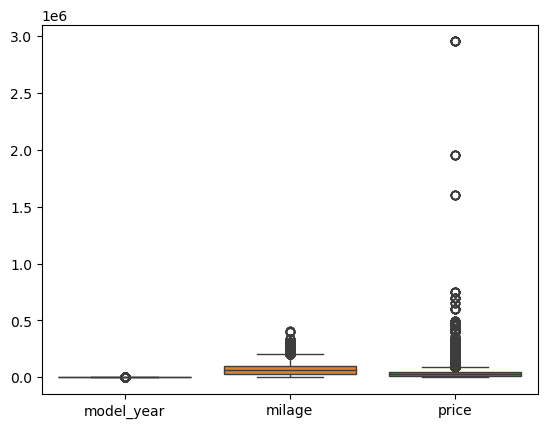

In [17]:
print(df_train.select_dtypes('int64').columns)
sns.boxplot(data=df_train[['model_year', 'milage', 'price']]);
plt.show()

(53005, 13)


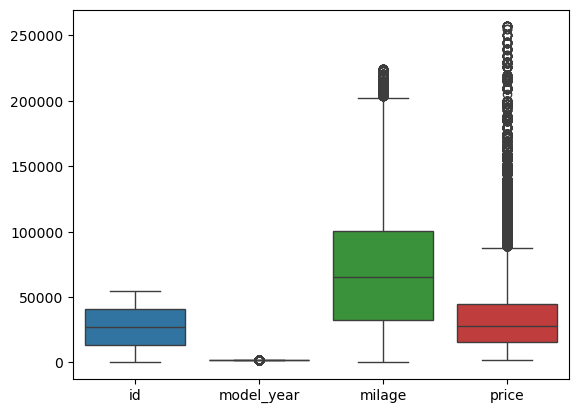

In [18]:
#Statistical identification using z-score method
z_scores = np.abs(stats.zscore(df_train[['model_year', 'milage', 'price']]))
df_train_cleaned = df_train[(z_scores <3).all(axis=1)]
print(df_train_cleaned.shape)
#View boxplot of data
sns.boxplot(data=df_train_cleaned)
plt.show();

In [19]:
### Check for Duplicates
duplicates_train = df_train_cleaned.duplicated().sum()
print(duplicates_train)
### validate categorical values
df_train_cleaned = df_train_cleaned.copy()
for col in df_train_cleaned.select_dtypes(include=['object']).columns:
    #print(f"Unique values in {col} :\n {df[col].unique()}")
    df_train_cleaned[col] = df_train_cleaned[col].str.lower().str.strip()

0


In [21]:
### validate categorical values
df_test_cleaned = df_test.copy()
for col in df_test.select_dtypes(include=['object']).columns:
    #print(f"Unique values in {col} :\n {df[col].unique()}")
    df_test_cleaned[col] = df_test_cleaned[col].str.lower().str.strip()

In [22]:
#Logical consistency checks for the column Year
print(df_test_cleaned.shape)
print(df_train_cleaned["model_year"].min())
print(df_train_cleaned["model_year"].max())
print(df_train_cleaned["model_year"].dtype)

(36183, 12)
1999
2024
int64


## Encode

In [23]:
for col in df_train_cleaned.select_dtypes('object').columns.values:
    print(f"{col} : {len(df_train_cleaned[col].unique())}")

brand : 52
model : 1809
fuel_type : 7
engine : 1056
transmission : 46
ext_col : 259
int_col : 123
accident : 2
clean_title : 1


In [24]:
for col in df_test_cleaned.select_dtypes('object').columns.values:
    print(f"{col} : {len(df_test_cleaned[col].unique())}")

brand : 53
model : 1788
fuel_type : 7
engine : 1038
transmission : 44
ext_col : 230
int_col : 111
accident : 2
clean_title : 1


In [25]:
#Initialize label encoder
label_encoder = LabelEncoder()
#Implement on columns
df_train_cleaned = df_train_cleaned.copy()
df_train_cleaned["brand_encoded"] = label_encoder.fit_transform(df_train_cleaned["brand"])
df_train_cleaned["model_encoded"] = label_encoder.fit_transform(df_train_cleaned["model"])
df_train_cleaned["engine_encoded"] = label_encoder.fit_transform(df_train_cleaned["engine"])
df_train_cleaned["transmission_encoded"] = label_encoder.fit_transform(df_train_cleaned["transmission"])
df_train_cleaned["extcol_encoded"] = label_encoder.fit_transform(df_train_cleaned["ext_col"])
df_train_cleaned["intcol_encoded"] = label_encoder.fit_transform(df_train_cleaned["int_col"])
df_train_cleaned.head(1)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,brand_encoded,model_encoded,engine_encoded,transmission_encoded,extcol_encoded,intcol_encoded
0,0,ford,f-150 lariat,2018,74349,gasoline,375.0hp 3.5l v6 cylinder engine gasoline fuel,10-speed a/t,blue,gray,none reported,yes,11000,13,640,715,2,25,56


In [26]:
#Initialize label encoder
label_encoder = LabelEncoder()
#Implement on columns
df_test_cleaned = df_test_cleaned.copy()
df_test_cleaned["brand_encoded"] = label_encoder.fit_transform(df_test_cleaned["brand"])
df_test_cleaned["model_encoded"] = label_encoder.fit_transform(df_test_cleaned["model"])
df_test_cleaned["engine_encoded"] = label_encoder.fit_transform(df_test_cleaned["engine"])
df_test_cleaned["transmission_encoded"] = label_encoder.fit_transform(df_test_cleaned["transmission"])
df_test_cleaned["extcol_encoded"] = label_encoder.fit_transform(df_test_cleaned["ext_col"])
df_test_cleaned["intcol_encoded"] = label_encoder.fit_transform(df_test_cleaned["int_col"])
df_test_cleaned.head(1)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,brand_encoded,model_encoded,engine_encoded,transmission_encoded,extcol_encoded,intcol_encoded
0,54273,mercedes-benz,e-class e 350,2014,73000,gasoline,302.0hp 3.5l v6 cylinder engine gasoline fuel,a/t,white,beige,none reported,yes,33,530,544,33,220,8


In [27]:
#One hot encoding for categorical columns
df_train_onehot = pd.get_dummies(df_train_cleaned,columns = ['fuel_type','accident','clean_title'])
print(df_train_onehot.iloc[:,10:].columns)
#Transform to Interger
df_train_onehot.iloc[:,10:] = df_train_onehot.iloc[:,10:].astype(int)
print(df_train_onehot.shape)
df_train_onehot.head(1)

Index(['brand_encoded', 'model_encoded', 'engine_encoded',
       'transmission_encoded', 'extcol_encoded', 'intcol_encoded',
       'fuel_type_diesel', 'fuel_type_e85 flex fuel', 'fuel_type_gasoline',
       'fuel_type_hybrid', 'fuel_type_not supported',
       'fuel_type_plug-in hybrid', 'fuel_type_–',
       'accident_at least 1 accident or damage reported',
       'accident_none reported', 'clean_title_yes'],
      dtype='object')
(53005, 26)


,id,brand,model,model_year,milage,engine,transmission,ext_col,int_col,price,...,fuel_type_diesel,fuel_type_e85 flex fuel,fuel_type_gasoline,fuel_type_hybrid,fuel_type_not supported,fuel_type_plug-in hybrid,fuel_type_–,accident_at least 1 accident or damage reported,accident_none reported,clean_title_yes
0,0,ford,f-150 lariat,2018,74349,375.0hp 3.5l v6 cylinder engine gasoline fuel,10-speed a/t,blue,gray,11000,...,0,0,1,0,0,0,0,0,1,1


In [28]:
#One hot encoding for categorical columns
df_test_onehot = pd.get_dummies(df_test_cleaned,columns = ['fuel_type','accident','clean_title'])
print(df_test_onehot.columns)
#Transform to Interger
df_test_onehot.iloc[:,9:] = df_test_onehot.iloc[:,9:].astype(int)
print(df_test_onehot.shape)
df_test_onehot.iloc[:,9:].head(1)

Index(['id', 'brand', 'model', 'model_year', 'milage', 'engine',
       'transmission', 'ext_col', 'int_col', 'brand_encoded', 'model_encoded',
       'engine_encoded', 'transmission_encoded', 'extcol_encoded',
       'intcol_encoded', 'fuel_type_diesel', 'fuel_type_e85 flex fuel',
       'fuel_type_gasoline', 'fuel_type_hybrid', 'fuel_type_not supported',
       'fuel_type_plug-in hybrid', 'fuel_type_–',
       'accident_at least 1 accident or damage reported',
       'accident_none reported', 'clean_title_yes'],
      dtype='object')
(36183, 25)


,brand_encoded,model_encoded,engine_encoded,transmission_encoded,extcol_encoded,intcol_encoded,fuel_type_diesel,fuel_type_e85 flex fuel,fuel_type_gasoline,fuel_type_hybrid,fuel_type_not supported,fuel_type_plug-in hybrid,fuel_type_–,accident_at least 1 accident or damage reported,accident_none reported,clean_title_yes
0,33,530,544,33,220,8,0,0,1,0,0,0,0,0,1,1


## Feature Engineering

In [29]:
df_train_onehot["car_age"] = 2024-df_train_onehot["model_year"]
df_train_onehot["av_milage"] = df_train_onehot["milage"]/df_train_onehot["car_age"]
df_test_onehot["car_age"] = 2024-df_test_onehot["model_year"]
df_test_onehot["av_milage"] = df_test_onehot["milage"]/df_test_onehot["car_age"]
print(df_test_onehot.shape)
print(df_train_onehot.shape)

(36183, 27)
(53005, 28)


## Check Correlation of Features with Price

### Heatmap

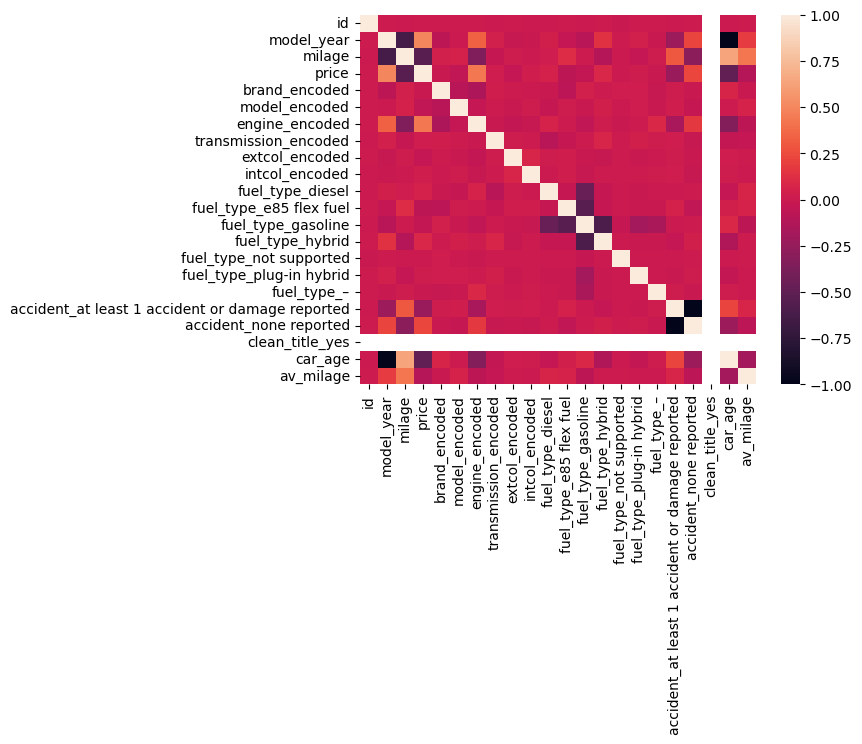

In [30]:
sns.heatmap(df_train_onehot.select_dtypes(['int64','int32','float64']).corr());

### Correlation Matrix

In [32]:
correlation_train = df_train_onehot.select_dtypes(['int64','int32','float64']).corr()["price"].sort_values(ascending=False)
print(correlation_train[np.abs(correlation_train)>0.2])

price                                              1.000000
model_year                                         0.493703
engine_encoded                                     0.435898
accident_none reported                             0.233108
accident_at least 1 accident or damage reported   -0.233108
car_age                                           -0.493703
milage                                            -0.535788
Name: price, dtype: float64


## Select the Columns with Highest Correlation

In [33]:
train_df = df_train_onehot[["price","milage","car_age","accident_at least 1 accident or damage reported","accident_none reported","engine_encoded"]]
print(train_df.shape)
train_df.head(3)

(53005, 6)


,price,milage,car_age,accident_at least 1 accident or damage reported,accident_none reported,engine_encoded
0,11000,74349,6,0,1,715
1,8250,80000,17,0,1,530
2,15000,91491,15,0,1,537


In [34]:
#Model selection and Training
#Choose appropriate regression model (linear regression, decision tree, random forest, gradient boosting)
#train using train dataset
target = "price"
X_train = train_df.drop(columns=[target])
X_test = df_test_onehot[X_train.columns]
y_train = train_df[target]
model = LinearRegression()
model.fit(X_train,y_train)
#Predictions
y_pred = pd.DataFrame(model.predict(X_test),index=df_test_onehot["id"],columns=['predicted price'])
y_pred.to_csv("submission_predictions.csv")
print(y_pred.shape)
y_pred.head()

(36183, 1)


,predicted price
id,
54273,34207.771336
54274,20955.297273
54275,32475.725958
54276,54510.532234
54277,37137.374683
